# Implementation of Gradient-Boost Algorithm

In [27]:
#Importing neccesary packages
# Load libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [26]:
!pip install xgboost

# Data Preparation

In [8]:
# Load data - Reading Boston Data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names) #Independent columns

y = pd.Series(boston.target) #Dependent column - Median value of House

#Data Definition
#CRIM: Per capita crime rate by town

#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

#INDUS: Proportion of non-retail business acres per town

#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

#NOX: Nitric oxide concentration (parts per 10 million)

#RM: Average number of rooms per dwelling

#AGE: Proportion of owner-occupied units built prior to 1940

#DIS: Weighted distances to five Boston employment centers

#RAD: Index of accessibility to radial highways

#TAX: Full-value property tax rate per $10,000

#PTRATIO: Pupil-teacher ratio by town

#B:  proportion of people of African American descent by town

#LSTAT: Percentage of lower status of the population

#MEDV: Median value of owner-occupied homes in $1000s (Output)

In [13]:
#Viewing Data - predictors
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y[1:10] #response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

# Model training and evaluation

In [16]:
# Create gradientboost REGRESSOR object
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

#Important Parameters

#n_estimators: Number of weak learners to train iteratively.

#learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [17]:
# Train gradientboost REGRESSOR
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [18]:
r2_score(y_pred,y_test)

0.7214253546031609

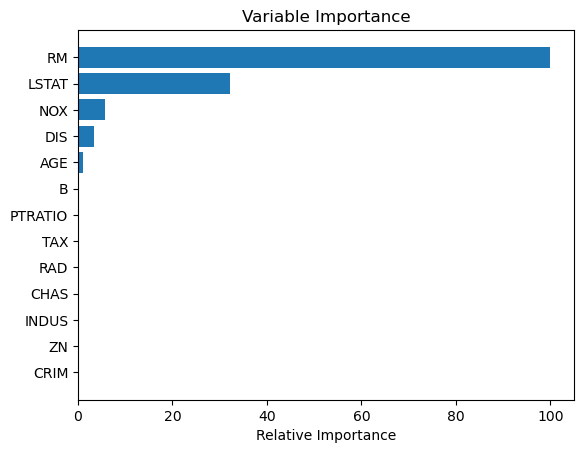

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Lets tune the hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV

LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')

tuning.fit(X_train,y_train)

tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 100}, 0.8599531328245131)

### Similarly other hyperparameters like max_depth, split criteria, min no of leaf nodes etc can be tuned

## Summary:

### Pros:
 
It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 

Gives better accuracy in most of the cases

### Cons:
Space and time complexity

Hyperparameter tuning

In [11]:
import optuna

In [22]:
!pip install optuna

     -------------------------------------- 365.3/365.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 210.5/210.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.1 MB/s eta 0:00:00


In [4]:
!pip install XGboost

^C


In [30]:
from sklearn.metrics import mean_squared_error
def objective(trail , data = X , target = y ):
    train_x , test_x ,train_y , test_y = train_test_split(data , target , test_size = .10,random_state = 30  )
    param = {
        'lambda':trail.suggest_loguniform('lambda' , 1e-4,10.0),
        'alpha' :trail.suggest_loguniform('alpha' , 1e-4 , 10.0),
        'colsample_bytree' :trail.suggest_categorical('colsample_bytree' , [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
        'subsample' :trail.suggest_categorical('subsample' , [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
        'learning_rate' : trail.suggest_categorical('learning_rate' , [.00001,.0003,.008,.02,.01,1,8]),
        'n_estimator' :30000,
        'max_depth' :trail.suggest_categorical('max_depth', [3,4,5,6,7,8,9,10,11,12]),
        'random_state' :trail.suggest_categorical('random_state' , [10,20,30 ,2000 , 3454,243123]),
        'min_child_weight' :trail.suggest_int('min_child_weight' ,1,200)
    }
    xgb_reg_model =xgb.XGBRegressor(**param)
    xgb_reg_model.fit(train_x,train_y,eval_set = [(test_x,test_y)] , verbose = True )
    pred_xgb = xgb_reg_model.predict(test_x)
    rmse = mean_squared_error(test_y,pred_xgb)
    return rmse

In [31]:
find_param = optuna.create_study(direction='minimize')
find_param.optimize(objective)
find_param.best_trial.params

[I 2023-02-28 12:59:46,021] A new study created in memory with name: no-name-75ed42c6-8dff-4b2b-9a95-d5fd05640acc


[12:59:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:21.92908
[1]	validation_0-rmse:21.92250
[2]	validation_0-rmse:21.91596
[3]	validation_0-rmse:21.90940
[4]	validation_0-rmse:21.90295
[5]	validation_0-rmse:21.89648
[6]	validation_0-rmse:21.89045
[7]	validation_0-rmse:21.88390
[8]	validation_0-rmse:21.87743
[9]	validation_0-rmse:21.87102
[10]	validation_0-rmse:21.86447
[11]	validation_0-rmse:21.85806
[12]	validation_0-rmse:21.85161
[13]	validation_0-rmse:21.84513
[14]	validation_0-rmse:21.83866
[15]	validation_0-rmse:21.83240
[16]	validation_0-rmse:21.82588
[17]	validation_0-rmse:21.81938
[18]	validation_0-rmse:21.81287
[19]	validation_0-rmse:21.80662
[20]	validation_0-rmse:21.80019
[21]	validation_0-rmse:21.79368
[22]	validation_0-rmse:21.78729
[23]	validation_0-rmse:21.78075
[24]	validation_0-rmse:21.77445
[25]	vali

[I 2023-02-28 12:59:46,254] Trial 0 finished with value: 453.69094684517296 and parameters: {'lambda': 0.0031831622277515496, 'alpha': 0.09027145270161313, 'colsample_bytree': 1, 'subsample': 0.7, 'learning_rate': 0.0003, 'max_depth': 3, 'random_state': 2000, 'min_child_weight': 120}. Best is trial 0 with value: 453.69094684517296.


[12:59:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:21.93563
[1]	validation_0-rmse:21.93563
[2]	validation_0-rmse:21.93563
[3]	validation_0-rmse:21.93563
[4]	validation_0-rmse:21.93563
[5]	validation_0-rmse:21.93563
[6]	validation_0-rmse:21.93563
[7]	validation_0-rmse:21.93563
[8]	validation_0-rmse:21.93563
[9]	validation_0-rmse:21.93563
[10]	validation_0-rmse:21.93563
[11]	validation_0-rmse:21.93563
[12]	validation_0-rmse:21.93563
[13]	validation_0-rmse:21.93563
[14]	validation_0-rmse:21.93563
[15]	validation_0-rmse:21.93563
[16]	validation_0-rmse:21.93563
[17]	validation_0-rmse:21.93563
[18]	validation_0-rmse:21.93563
[19]	validation_0-rmse:21.93563
[20]	validation_0-rmse:21.93563
[21]	validation_0-rmse:21.93563
[22]	validation_0-rmse:21.93563
[23]	validation_0-rmse:21.93563
[24]	validation_0-rmse:21.93563
[25]	vali

[I 2023-02-28 12:59:46,451] Trial 1 finished with value: 462.646819155684 and parameters: {'lambda': 0.001626953433317547, 'alpha': 0.00017941849462326133, 'colsample_bytree': 0.8, 'subsample': 0.2, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 243123, 'min_child_weight': 111}. Best is trial 0 with value: 453.69094684517296.


[12:59:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-rmse:155.72110
[1]	validation_0-rmse:1078.46512
[2]	validation_0-rmse:7563.24634
[3]	validation_0-rmse:52929.06744
[4]	validation_0-rmse:370512.72381
[5]	validation_0-rmse:2593577.85425
[6]	validation_0-rmse:18155050.86077
[7]	validation_0-rmse:127085301.90683
[8]	validation_0-rmse:889596928.06181
[9]	validation_0-rmse:6227176376.33505
[10]	validation_0-rmse:43590221215.27843
[11]	validation_0-rmse:305131451878.10608
[12]	validation_0-rmse:2135919450471.73047
[13]	validation_0-rmse:14951431372413.91211
[14]	validation_0-rmse:104659983034191.98438
[15]	validation_0-rmse:732619627433492.75000
[16]	validation_0-rmse:5128335811876688.00000
[17]	validation_0-rmse:35898337414648100.00000
[18]	validation_0-rmse:251288283080566656.00000
[19]	validation_0-rmse:1759017372101032704.

[W 2023-02-28 12:59:46,538] Trial 2 failed with parameters: {'lambda': 0.00010196680993841452, 'alpha': 4.458845484067354, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 8, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 188} because of the following error: ValueError("could not convert string to float: '-nan(ind)'").
Traceback (most recent call last):
  File "C:\Users\Barath Murugan\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_24028\2874216549.py", line 16, in objective
    xgb_reg_model.fit(train_x,train_y,eval_set = [(test_x,test_y)] , verbose = True )
  File "C:\Users\Barath Murugan\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Barath Murugan\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\Barath Murugan\anac

ValueError: could not convert string to float: '-nan(ind)'